In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

with open(f"/vols/cms/emc21/FCC/FCC-Study/runs/e240_full_run_fixedLumis/run1/combine_grid_space_2.5_scaled0.1/all_limits.json", "r") as f:
    all_limits = json.load(f)

In [2]:
def fillMissingLimits(limits):
    for val in ['0.03', '0.16', '0.5', '0.84', '0.97']:
        if val not in limits:
            limits[val] = 0
    
    return limits

In [3]:
# First I need to make the grid
all_ms = np.loadtxt("/vols/cms/emc21/FCC/FCC-Study/runs/e240_full_run_fixedLumis/run1/combine_grid_space_2.5_scaled0.1/mass_scan.txt")

mHs = np.unique(all_ms[:, 0])
# For a single mH, get the values of mA - mH
diff_scan = all_ms[all_ms[:, 0] == mHs[0], 1] - mHs[0]

# Now need to make a 2d grid to store the limits
grid = np.zeros((len(diff_scan), len(mHs)))

In [4]:
len(grid)

45

In [5]:
plot_grid = np.ones((len(diff_scan)+1, len(mHs))) * -1
plot_grid_for_contour = np.ones((len(diff_scan)+1, len(mHs))) * 10      
plot_grid_for_up_contour = np.ones((len(diff_scan)+1, len(mHs))) * 10 
plot_grid_for_down_contour = np.ones((len(diff_scan)+1, len(mHs))) * 10 

for mass_point, limit_dict in all_limits.items():
    print(mass_point)
    mH = float(mass_point.split("_")[0].split("mH")[1])
    mA = float(mass_point.split("mA")[1])

    print(mH, mA)

    if mA - mH <= 30:
        # if small mass splitting then use the muon limits
        limits = limit_dict["MuMu"]
    else:

        try:
            limits = limit_dict['combined']
        except:
            limits = limit_dict["MuMu"]


    
    # limits = f["limit"]["limit"].array()
    limits = fillMissingLimits(limits)

    #! To change, this is just for Mu-Mu case
    limits = limit_dict["MuMu"]

    try:
        limit = limits['0.5']
    except:
        print(f"Couldn't find 0.5 limit for {mass_point}, skipping for now")
        limits = {
            0.5 : 0, 0.84 : 0, 0.16 : 0
        }
        # continue

    if '0.84' not in limits:
        limits['0.84'] = 0


    deltaAH = int(mA - mH)

    row_idx = 100 - deltaAH
    col_idx = mH - 70
    row_idx = len(diff_scan) - np.where(diff_scan == mA - mH)[0][0]
    col_idx = np.where(mHs == mH)[0][0]

    #print(mH, mA, deltaAH)  

    #print(row_idx, col_idx)

    plot_grid[row_idx, col_idx] = limit

    plot_grid_for_contour[row_idx, col_idx] = limit

    plot_grid_for_up_contour[row_idx, col_idx] = limits['0.84']
    plot_grid_for_down_contour[row_idx, col_idx] = limits['0.16']

    


mH100.0_mA110.0
100.0 110.0
mH100.0_mA112.5
100.0 112.5
mH100.0_mA115.0
100.0 115.0
mH100.0_mA117.5
100.0 117.5
mH100.0_mA120.0
100.0 120.0
mH100.0_mA122.5
100.0 122.5
mH100.0_mA125.0
100.0 125.0
mH100.0_mA127.5
100.0 127.5
mH100.0_mA130.0
100.0 130.0
mH100.0_mA132.5
100.0 132.5
mH100.0_mA135.0
100.0 135.0
mH102.5_mA112.5
102.5 112.5
mH102.5_mA115.0
102.5 115.0
mH102.5_mA117.5
102.5 117.5
mH102.5_mA120.0
102.5 120.0
mH102.5_mA122.5
102.5 122.5
mH102.5_mA125.0
102.5 125.0
mH102.5_mA127.5
102.5 127.5
mH102.5_mA130.0
102.5 130.0
mH102.5_mA132.5
102.5 132.5
mH105.0_mA115.0
105.0 115.0
mH105.0_mA117.5
105.0 117.5
mH105.0_mA120.0
105.0 120.0
mH105.0_mA122.5
105.0 122.5
mH105.0_mA125.0
105.0 125.0
mH105.0_mA127.5
105.0 127.5
mH105.0_mA130.0
105.0 130.0
mH105.0_mA132.5
105.0 132.5
mH107.5_mA117.5
107.5 117.5
mH107.5_mA120.0
107.5 120.0
mH107.5_mA122.5
107.5 122.5
mH107.5_mA125.0
107.5 125.0
mH107.5_mA127.5
107.5 127.5
mH107.5_mA130.0
107.5 130.0
mH110.0_mA120.0
110.0 120.0
mH50.0_mA100.0
50.0 

In [6]:
# Now need to make a 2d grid to store the limits
grid = np.zeros((len(diff_scan), len(mHs)))


plot_grid = np.ones((len(diff_scan)+1, len(mHs))) * -1
plot_grid_for_contour = np.ones((len(diff_scan)+1, len(mHs))) * 10      
plot_grid_for_up_contour = np.ones((len(diff_scan)+1, len(mHs))) * 10 
plot_grid_for_down_contour = np.ones((len(diff_scan)+1, len(mHs))) * 10 

for mass_point, limit_dict in all_limits.items():
    mH = float(mass_point.split("_")[0].split("mH")[1])
    mA = float(mass_point.split("mA")[1])

    if mA - mH <= 30:
        # if small mass splitting then use the muon limits
        limits = limit_dict["MuMu"]
    else:

        try:
            limits = limit_dict['combined']
        except:
            limits = limit_dict["MuMu"]


    
    # limits = f["limit"]["limit"].array()
    limits = fillMissingLimits(limits)

    # #! To change, this is just for Mu-Mu case
    # limits = limit_dict["MuMu"]

    try:
        limit = limits['0.5']
    except:
        print(f"Couldn't find 0.5 limit for {mass_point}, skipping for now")
        limits = {
            0.5 : 0, 0.84 : 0, 0.16 : 0
        }
        # continue

    if '0.84' not in limits:
        limits['0.84'] = 0


    deltaAH = int(mA - mH)

    row_idx = len(diff_scan) - np.where(diff_scan == mA - mH)[0][0]
    col_idx = np.where(mHs == mH)[0][0]

    #print(mH, mA, deltaAH)  

    #print(row_idx, col_idx)

    plot_grid[row_idx, col_idx] = limit

    plot_grid_for_contour[row_idx, col_idx] = limit

    plot_grid_for_up_contour[row_idx, col_idx] = limits['0.84']
    plot_grid_for_down_contour[row_idx, col_idx] = limits['0.16']

    
dx = (mHs[1]-mHs[0])/2.
dy = (diff_scan[1]-diff_scan[0])/2.
extent = [mHs[0]-dx, mHs[-1]+dx, diff_scan[0]-dy, diff_scan[-1]+dy]

In [44]:
ecom = 240 
skipSigmaBands = False
lumi = 1.08
plot_excluded = True

max_mH = 115.0


Text(0.445, 0.77, '\\begin{eqnarray*}\\textit{limit} = \\Biggl\\{  \\begin{array}{l} e\\textit{-}e/\\mu\\textit{-}\\mu \\quad \\textit{if}\\ \\quad \\Delta(M_A,M_H) \\geq 30 GeV\\\\  \\mu\\textit{-}\\mu \\quad \\quad \\; \\; \\, \\textit{if}\\ \\quad \\Delta(M_A,M_H) < 30 GeV\\end{array}\\end{eqnarray*}')

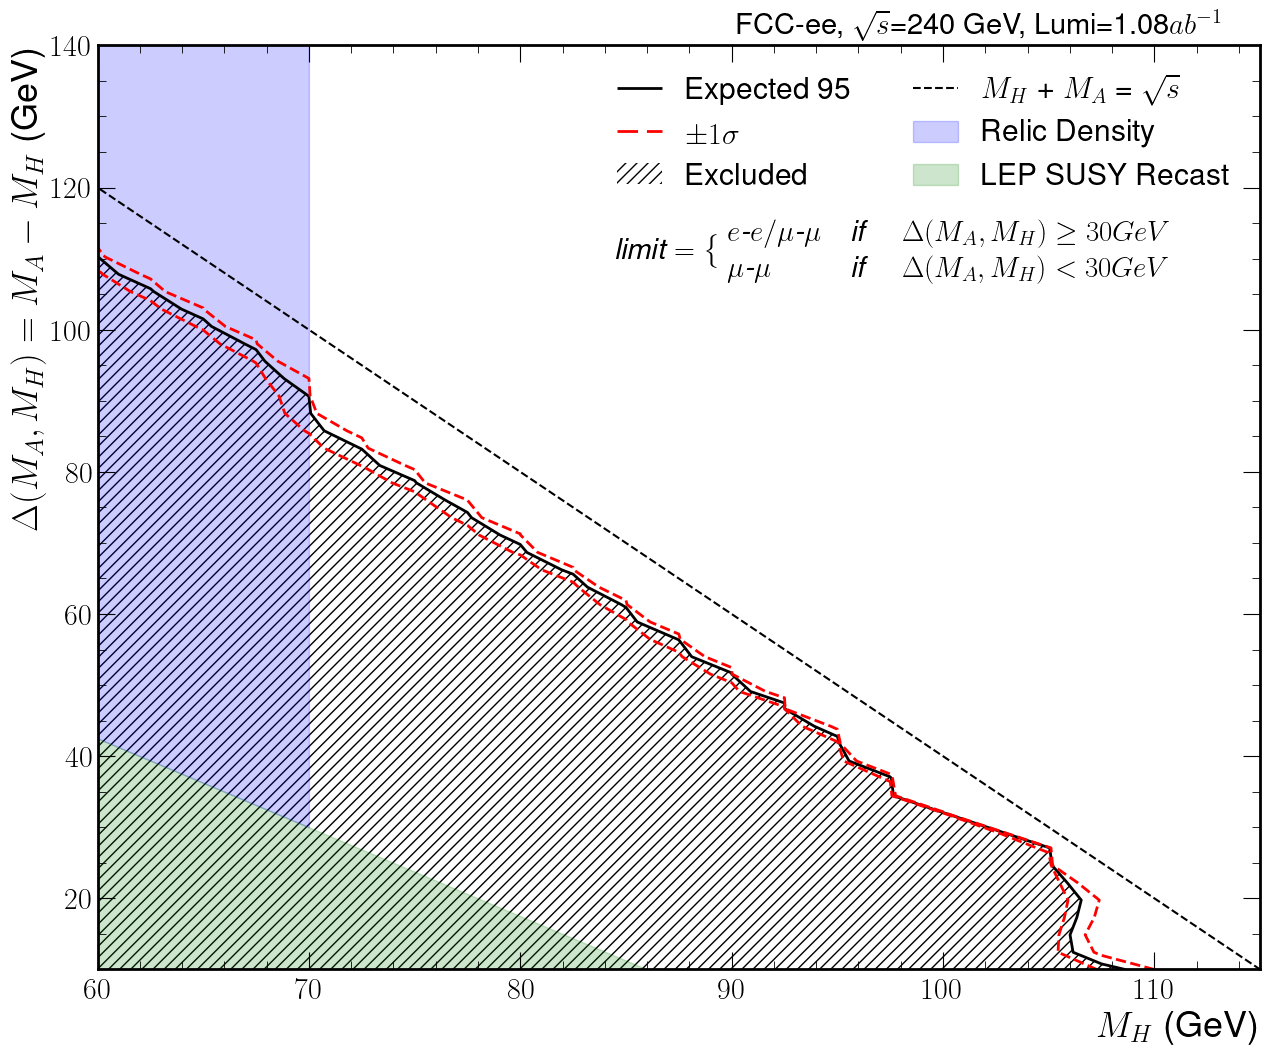

In [56]:
import mplhep as hep

plt.style.use(hep.style.CMS)
plt.rcParams['text.usetex'] = True

fig, ax = plt.subplots(figsize=(15,12))

cmap = plt.cm.viridis
cmap.set_bad(color='white')
masked_array = np.ma.masked_where(np.ones_like(plot_grid) * -1 == -1, plot_grid)
im = ax.imshow(masked_array, cmap = cmap, aspect='auto', extent=extent)


max_mH = (ecom - np.min(diff_scan)) / 2
print(f"max_mH = {max_mH}")

line = plt.plot([np.min(mHs), max_mH], [ecom - 2 * np.min(mHs), np.min(diff_scan)], color='black', linestyle='--', label = f'$M_H$ + $M_A$ = {ecom} GeV')
plt.xlim(60, max_mH)
plt.ylim(np.min(diff_scan), ecom - 2 * np.min(mHs))



con = plt.contour(plot_grid_for_contour, np.array([1]) , colors=['black'], linewidths=[2], extent=extent, origin='upper')
handles_con, labels = con.legend_elements()

con_filled = plt.contourf(plot_grid_for_contour, np.array([0, 1]), colors=['white', 'white'],
                hatches = ['///', '//////'], levels=[0, 1], alpha=0.5, extent=extent, origin='upper')
handles_con_filled, labels_filled = con_filled.legend_elements()

legend_elements = []
legend_names = []

if not skipSigmaBands:
    con_up = plt.contour(plot_grid_for_up_contour, np.array([1]) , colors=['red'], 
                        linewidths=[2], linestyles=['--'], extent=extent, origin='upper')
    handles_con_up, labels_con_up = con_up.legend_elements()

    con_down = plt.contour(plot_grid_for_down_contour, np.array([1]) , colors=['red'], 
                        linewidths=[2], linestyles=['--'], extent=extent, origin='upper')
    handles_con_down, labels_con_down = con_down.legend_elements()

    legend_elements += handles_con + handles_con_up + handles_con_filled  + line
    legend_names += ["Expected 95% CL", "$\pm 1 \sigma$", "Excluded", '$M_H$ + $M_A$ = $\sqrt{s}$']


else:
    legend_elements + handles_con + handles_con_filled  + line
    legend_names += ["Expected 95% CL", "$\pm 1 \sigma$", "Excluded", '$M_H$ + $M_A$ = $\sqrt{s}$']
    




if plot_excluded:
    x = np.arange(50, 71, 1)
    y1 = (-5 / 4) * x + 117.5
    y2 = 150 * np.ones_like(x)
    excl_dm = plt.fill_between(x, y1, y2, color='blue', alpha=0.2, label = 'Excluded by DM Observations')
    #handles_excl_dm, labels_excl_dm = excl_dm.legend_elements()

    x2 = np.arange(50, 91, 1)
    y3 = (-5 / 4) * x2 + 117.5
    y4 = 10 * np.ones_like(x2)
    excl_LEP = plt.fill_between(x2, y3, y4, color='green', alpha=0.2, label = 'Excluded by LEP')

    legend_elements += [excl_dm, excl_LEP]
    legend_names += ["Relic Density", "LEP SUSY Recast"]

ax.legend(legend_elements, 
          legend_names, 
          loc='upper right', ncol=2)

plt.xlabel("$M_H$ (GeV)")
plt.ylabel(r"$\Delta(M_A,M_H) = M_A - M_H$ (GeV)")   


plt.text(0.55, 1.013, r"FCC-ee,  $\sqrt{s}$" + f"={ecom} GeV,  " + f"Lumi={lumi}" + "$ab^{-1}$", fontsize="21",
             transform=ax.transAxes)


eq1 = (r"\begin{eqnarray*}"
        r"\textit{limit} = \Biggl\{"
        r"  \begin{array}{l}"
        r" e\textit{-}e/\mu\textit{-}\mu \quad \textit{if}\ \quad \Delta(M_A,M_H) \geq 30 GeV\\"
        r"  \mu\textit{-}\mu \quad \quad \; \; \, \textit{if}\ \quad \Delta(M_A,M_H) < 30 GeV"
        r"\end{array}"
       r"\end{eqnarray*}")
plt.text(0.445, 0.77, eq1, fontsize="21",
             transform=ax.transAxes)



In [30]:
excl_dm?

Type:            PolyCollection
String form:     <matplotlib.collections.PolyCollection object at 0x7f8a28f126d0>
File:            ~/micromamba/envs/FCC-forAMstudent/lib/python3.9/site-packages/matplotlib/collections.py
Docstring:       <no docstring>
Class docstring: Base class for collections that have an array of sizes.
Init docstring: 
Parameters
----------
verts : list of array-like
    The sequence of polygons [*verts0*, *verts1*, ...] where each
    element *verts_i* defines the vertices of polygon *i* as a 2D
    array-like of shape (M, 2).
sizes : array-like, default: None
    Squared scaling factors for the polygons. The coordinates of each
    polygon *verts_i* are multiplied by the square-root of the
    corresponding entry in *sizes* (i.e., *sizes* specify the scaling
    of areas). The scaling is applied before the Artist master
    transform.
closed : bool, default: True
    Whether the polygon should be closed by adding a CLOSEPOLY
    connection at the end.
**kwargs
  

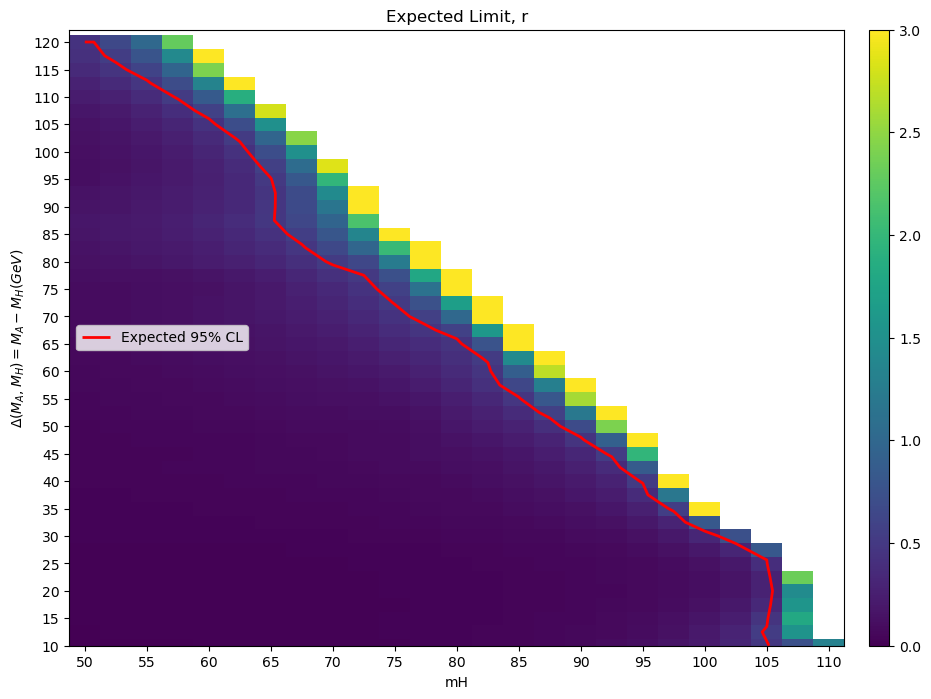

In [9]:
fig, ax = plt.subplots(figsize=(10,8))
cmap = plt.cm.viridis
cmap.set_bad(color='white')
masked_array = np.ma.masked_where(plot_grid == -1, plot_grid)
im = ax.imshow(masked_array, cmap = cmap, aspect='auto')


# Show all ticks and label them with the respective list entries
sep = 5
# Locations of the yticks
yticks_loc = np.arange(1, 46, 2)
yticks_names = np.arange(120, 5, -5) #np.arange(20, 102, 2)#diff_scan -1 #np.arange(20, 105, 5)
ax.set_yticks(yticks_loc, labels=yticks_names)
xticks_loc = np.arange(0, 25, 2)
xticks_names = np.arange(50, 115, 5)
ax.set_xticks(xticks_loc, labels=xticks_names)


plt.ylim(45, 0.1)


con = plt.contour(plot_grid_for_contour, np.array([0.5]) , colors=['red'], linewidths=[2])
handles_con, labels_up = con.legend_elements()


ax.legend(handles_con,
          ["Expected 95% CL"], loc='center left')


im.set_clim(0, 3)

plt.xlabel("mH")
plt.ylabel(r"$\Delta(M_A,M_H) = M_A - M_H (GeV)$")   

plt.title("Expected Limit, r")
cax = fig.add_axes([ax.get_position().x1+0.025,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax)

Text(0.5, 0.73, '\\begin{eqnarray*}\\textit{limit} = \\Biggl\\{  \\begin{array}{l} e\\textit{-}e/\\mu\\textit{-}\\mu \\quad \\textit{if}\\ \\quad \\Delta(M_A,M_H) \\geq 30 GeV\\\\  \\mu\\textit{-}\\mu \\quad \\quad \\; \\; \\, \\textit{if}\\ \\quad \\Delta(M_A,M_H) < 30 GeV\\end{array}\\end{eqnarray*}')

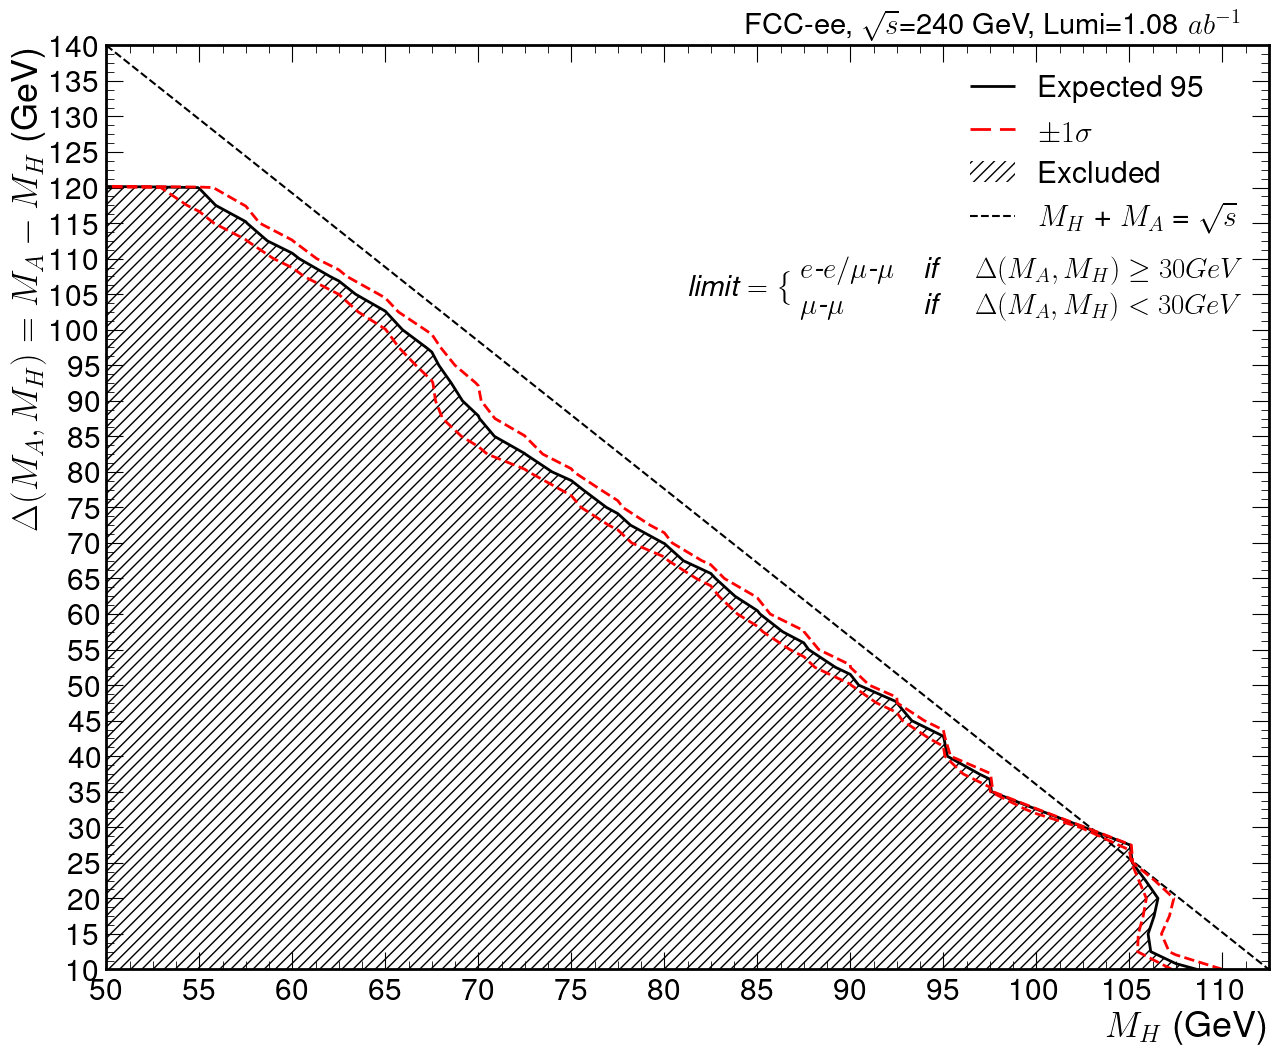

In [20]:
import mplhep as hep

plt.style.use(hep.style.CMS)
plt.rcParams['text.usetex'] = True

fig, ax = plt.subplots(figsize=(15,12))

cmap = plt.cm.viridis
cmap.set_bad(color='white')
masked_array = np.ma.masked_where(np.ones_like(plot_grid) * -1 == -1, plot_grid)
im = ax.imshow(masked_array, cmap = cmap, aspect='auto')

line = plt.plot([0, 25], [-7, 45], color='black', linestyle='--', label = '$M_H$ + $M_A$ = 240 GeV')

# Show all ticks and label them with the respective list entries
yticks_loc = np.arange(-7, 46, 2)
yticks_names = np.arange(140, 5, -5) #np.arange(20, 102, 2)#diff_scan -1 #np.arange(20, 105, 5)
ax.set_yticks(yticks_loc, labels=yticks_names)
xticks_loc = np.arange(0, 27, 2)
xticks_names = np.arange(50, 120, 5)
ax.set_xticks(xticks_loc, labels=xticks_names)



plt.ylim(45, -7)


# plt.ylim(41, 0)
plt.xlim(0, 25)


#plt.contour(plot_grid, np.array([1]) , colors=['yellow'], linewidths=[5])

con = plt.contour(plot_grid_for_contour, np.array([1]) , colors=['black'], linewidths=[2])
handles_con, labels = con.legend_elements()

con_up = plt.contour(plot_grid_for_up_contour, np.array([1]) , colors=['red'], 
                     linewidths=[2], linestyles=['--'])
handles_con_up, labels_con_up = con_up.legend_elements()

con_down = plt.contour(plot_grid_for_down_contour, np.array([1]) , colors=['red'], 
                     linewidths=[2], linestyles=['--'])
handles_con_down, labels_con_down = con_down.legend_elements()

con_filled = plt.contourf(plot_grid_for_contour, np.array([0, 1]), colors=['white', 'white'],
                   hatches = ['///', '//////'], levels=[0, 1], alpha=0.5)
handles_con_filled, labels_filled = con_filled.legend_elements()

ax.legend(handles_con + handles_con_up + handles_con_filled  + line,
          ["Expected 95% CL", "$\pm 1 \sigma$", "Excluded", '$M_H$ + $M_A$ = $\sqrt{s}$'], 
          loc='upper right')


plt.xlabel("$M_H$ (GeV)")
plt.ylabel(r"$\Delta(M_A,M_H) = M_A - M_H$ (GeV)")   


plt.text(0.55, 1.013, r"FCC-ee,  $\sqrt{s}$=240 GeV,  Lumi=1.08 $ab^{-1}$", fontsize="21",
             transform=ax.transAxes)

# Plot diagonal line for mA + mH = 240
#plt.plot([25, 0], [0, 25], color='black', linestyle='--')


eq1 = (r"\begin{eqnarray*}"
        r"\textit{limit} = \Biggl\{"
        r"  \begin{array}{l}"
        r" e\textit{-}e/\mu\textit{-}\mu \quad \textit{if}\ \quad \Delta(M_A,M_H) \geq 30 GeV\\"
        r"  \mu\textit{-}\mu \quad \quad \; \; \, \textit{if}\ \quad \Delta(M_A,M_H) < 30 GeV"
        r"\end{array}"
       r"\end{eqnarray*}")
plt.text(0.5, 0.73, eq1, fontsize="21",
             transform=ax.transAxes)
# plt.savefig("limit.pdf", bbox_inches='tight')
#plt.title("Expected Limit, r")



In [16]:
dir(handles_con_up)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [68]:
# Now for the significance
with open(f"/vols/cms/emc21/FCC/FCC-Study/runs/e240_full_run_fixedLumis/run1/combine_grid_space_2.5_scaled0.01/all_signifs.json", "r") as f:
    all_signifs = json.load(f)


plot_grid = np.ones((len(diff_scan)+1, len(mHs))) * -1
plot_grid_for_contour = np.ones((len(diff_scan)+1, len(mHs))) * -1      

for mass_point, signif_dict in all_signifs.items():
    mH = float(mass_point.split("_")[0].split("mH")[1])
    mA = float(mass_point.split("mA")[1])


    #! To change, this is just for Mu-Mu case
    # print(mass_point)
    # try:
    #     signif = signif_dict["combined"]
    # except:
    #     signif = signif_dict["MuMu"]

    signif = signif_dict["MuMu"]

    deltaAH = int(mA - mH)

    row_idx = 100 - deltaAH
    col_idx = mH - 70
    row_idx = len(diff_scan) - np.where(diff_scan == mA - mH)[0][0]
    col_idx = np.where(mHs == mH)[0][0]

    #print(mH, mA, deltaAH)  

    #print(row_idx, col_idx)

    plot_grid[row_idx, col_idx] = signif

    plot_grid_for_contour[row_idx, col_idx] = signif

    


Text(0.5, 0.73, '\\begin{eqnarray*}\\textit{limit} = \\Biggl\\{  \\begin{array}{l} e\\textit{-}e/\\mu\\textit{-}\\mu \\quad \\textit{if}\\ \\quad \\Delta(M_A,M_H) \\geq 30 GeV\\\\  \\mu\\textit{-}\\mu \\quad \\quad \\; \\; \\, \\textit{if}\\ \\quad \\Delta(M_A,M_H) < 30 GeV\\end{array}\\end{eqnarray*}')

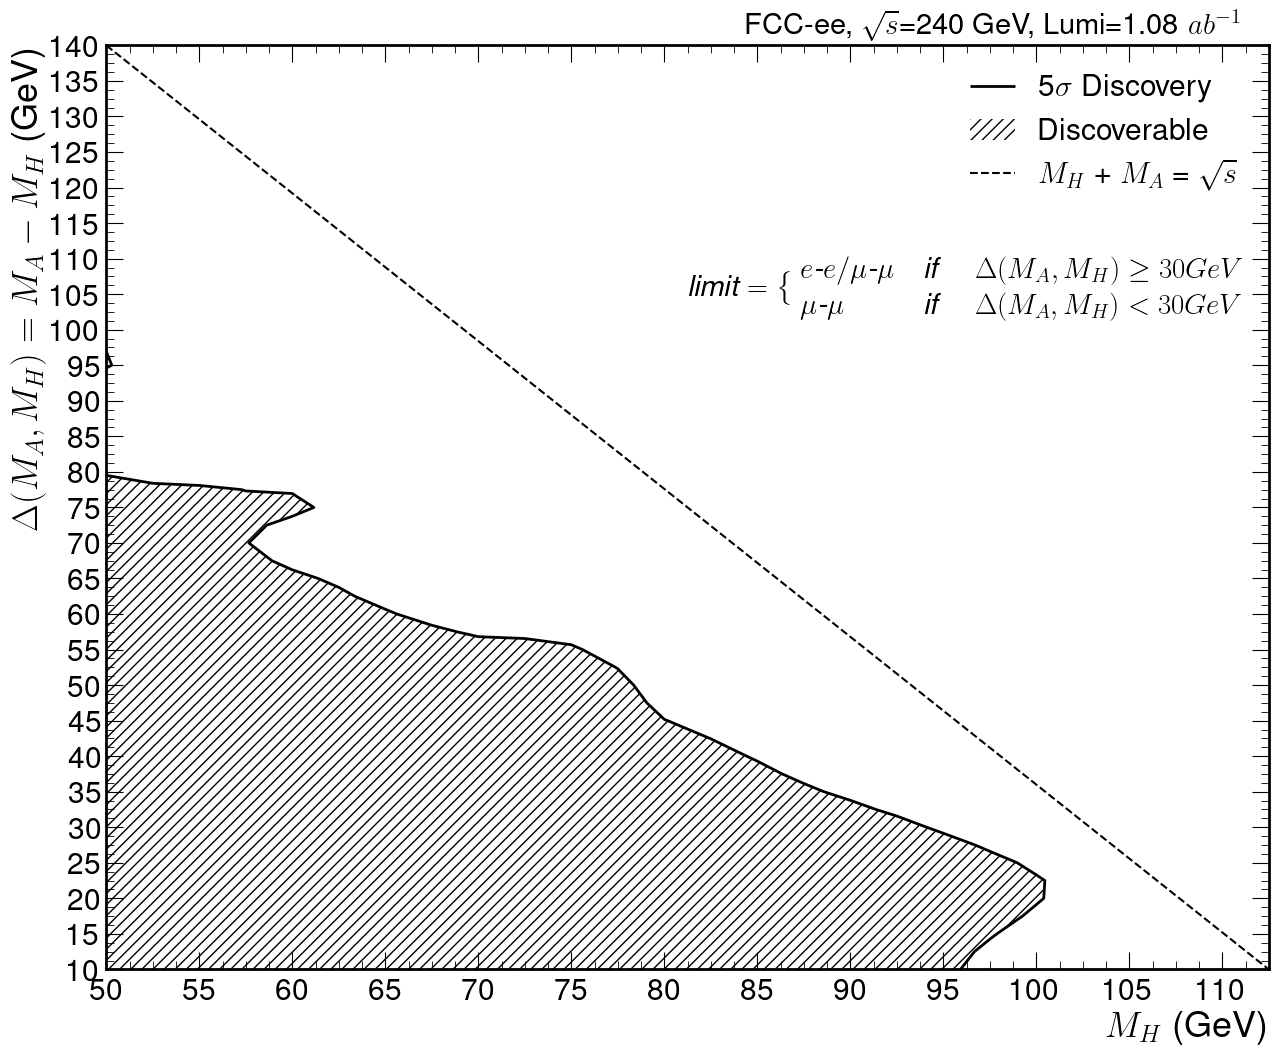

In [69]:
import mplhep as hep

plt.style.use(hep.style.CMS)
plt.rcParams['text.usetex'] = True

fig, ax = plt.subplots(figsize=(15,12))

cmap = plt.cm.viridis
cmap.set_bad(color='white')
masked_array = np.ma.masked_where(np.ones_like(plot_grid) * -1 == -1, plot_grid)
im = ax.imshow(masked_array, cmap = cmap, aspect='auto')

line = plt.plot([0, 25], [-7, 45], color='black', linestyle='--', label = '$M_H$ + $M_A$ = 240 GeV')

# Show all ticks and label them with the respective list entries
yticks_loc = np.arange(-7, 46, 2)
yticks_names = np.arange(140, 5, -5) #np.arange(20, 102, 2)#diff_scan -1 #np.arange(20, 105, 5)
ax.set_yticks(yticks_loc, labels=yticks_names)
xticks_loc = np.arange(0, 27, 2)
xticks_names = np.arange(50, 120, 5)
ax.set_xticks(xticks_loc, labels=xticks_names)



plt.ylim(45, -7)


# plt.ylim(41, 0)
plt.xlim(0, 25)


#plt.contour(plot_grid, np.array([1]) , colors=['yellow'], linewidths=[5])

con = plt.contour(plot_grid_for_contour, np.array([5]) , colors=['black'], linewidths=[2])
handles_con, labels = con.legend_elements()

con_filled = plt.contourf(plot_grid_for_contour, np.array([5, np.inf]), colors=['white', 'white'],
                   hatches = ['///', '//////'], levels=[5, np.inf], alpha=0.5)
handles_con_filled, labels_filled = con_filled.legend_elements()

ax.legend(handles_con + handles_con_filled  + line,
          ["5$\sigma$ Discovery", "Discoverable", '$M_H$ + $M_A$ = $\sqrt{s}$'], 
          loc='upper right')


plt.xlabel("$M_H$ (GeV)")
plt.ylabel(r"$\Delta(M_A,M_H) = M_A - M_H$ (GeV)")   


plt.text(0.55, 1.013, r"FCC-ee,  $\sqrt{s}$=240 GeV,  Lumi=1.08 $ab^{-1}$", fontsize="21",
             transform=ax.transAxes)

# Plot diagonal line for mA + mH = 240
#plt.plot([25, 0], [0, 25], color='black', linestyle='--')


eq1 = (r"\begin{eqnarray*}"
        r"\textit{limit} = \Biggl\{"
        r"  \begin{array}{l}"
        r" e\textit{-}e/\mu\textit{-}\mu \quad \textit{if}\ \quad \Delta(M_A,M_H) \geq 30 GeV\\"
        r"  \mu\textit{-}\mu \quad \quad \; \; \, \textit{if}\ \quad \Delta(M_A,M_H) < 30 GeV"
        r"\end{array}"
       r"\end{eqnarray*}")
plt.text(0.5, 0.73, eq1, fontsize="21",
             transform=ax.transAxes)
# plt.savefig("limit.pdf", bbox_inches='tight')
#plt.title("Expected Limit, r")



In [85]:
masked_array

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20,
  dtype=float64)

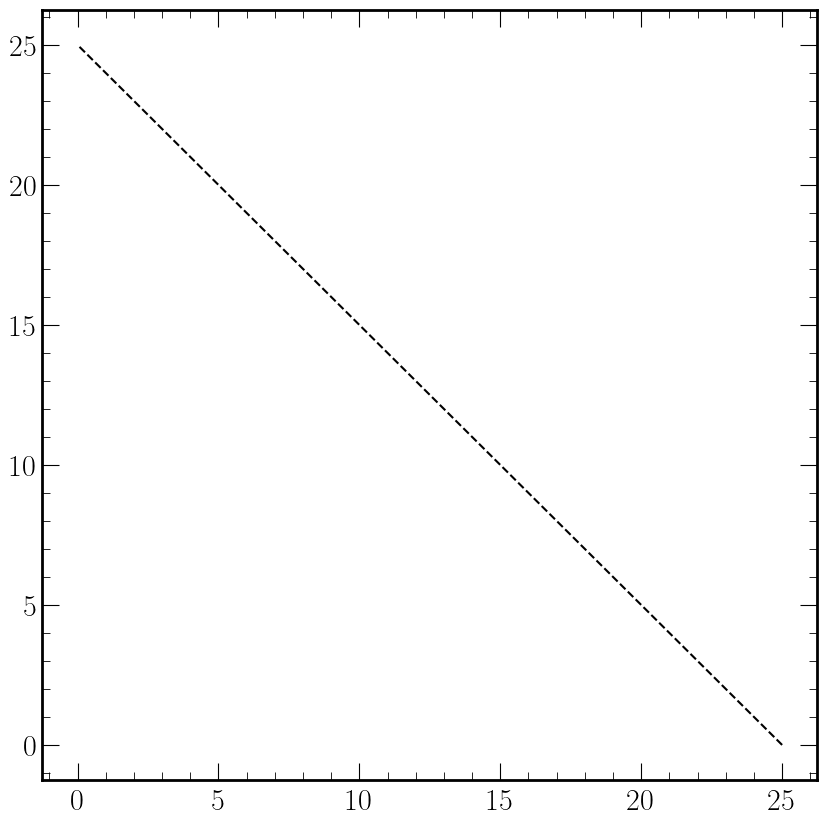

In [37]:
plt.plot([25, 0], [0, 25], color='black', linestyle='--')

In [ ]:
r"x = \begin{cases}"
r"  0, & \text{if } a = 1, \\"
r"  1, & \text{otherwise}."
r"\end{cases}"

In [ ]:
\left{\begin{array}{@{}ll@{}} 0, & \text{if}\ a=1 \\ 1, & \text{otherwise} \end{array}\right.%

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.09326172, 0.14599609, 0.20800781, ..., 1.        , 1.        ,
        1.        ],
       [0.0859375 , 0.10986328, 0.14013672, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.05908203, 0.75390625,
        1.        ],
       [0.        , 0.00244141, 0.00244141, ..., 0.04199219, 0.10888672,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.02685547, 0.03955078,
        0.07324219]])

In [106]:
plot_grid_for_contour

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.09326172, 0.14599609, 0.20800781, ..., 1.        , 1.        ,
        1.        ],
       [0.0859375 , 0.10986328, 0.14013672, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.05908203, 0.75390625,
        1.        ],
       [1.        , 0.00244141, 0.00244141, ..., 0.04199219, 0.10888672,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.02685547, 0.03955078,
        0.07324219]])

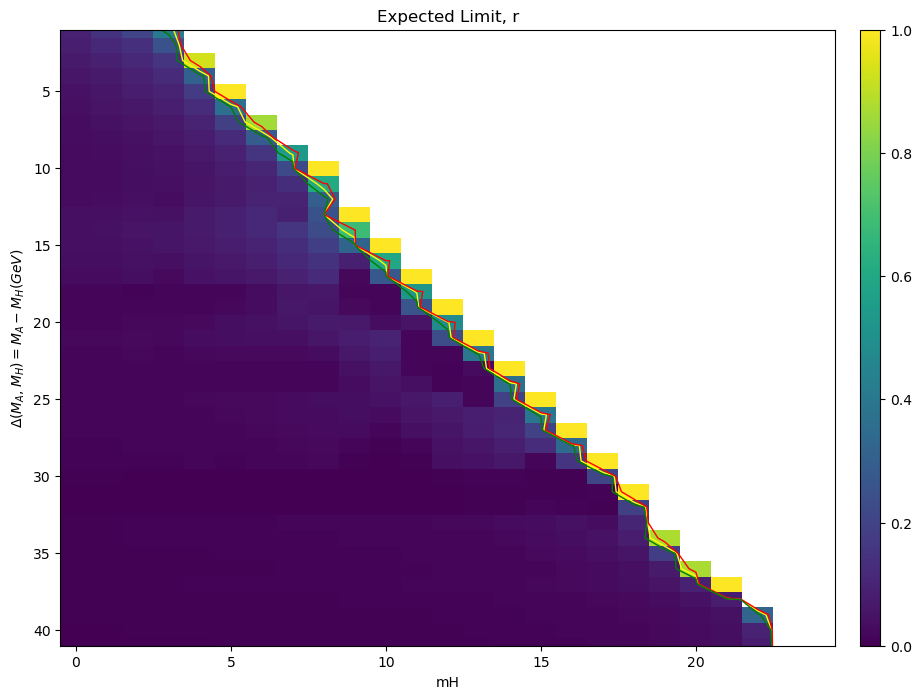

In [57]:
fig, ax = plt.subplots(figsize=(10,8))
cmap = plt.cm.viridis
cmap.set_bad(color='white')
masked_array = np.ma.masked_where(plot_grid == -1, plot_grid)
im = ax.imshow(masked_array, cmap = cmap, aspect='auto')


# Show all ticks and label them with the respective list entries
sep = 5
# Locations of the yticks
# yticks_loc = np.arange(1, 45, 5)
# yticks_names = np.arange(100, 10, -10) #np.arange(20, 102, 2)#diff_scan -1 #np.arange(20, 105, 5)
# ax.set_yticks(yticks_loc, labels=yticks_names)
# xticks_loc = np.arange(0, 31, 5)
# xticks_names = np.arange(70, 140, 10)
# ax.set_xticks(xticks_loc, labels=xticks_names)

plt.ylim(41, 1)


plt.contour(plot_grid_for_contour, np.array([0.5]) , colors=['yellow'], linewidths=[1])
plt.contour(plot_grid_for_down_contour, np.array([0.5]) , colors=['red'], linewidths=[1])
plt.contour(plot_grid_for_up_contour, np.array([0.5]) , colors=['green'], linewidths=[1])



im.set_clim(0, 1)

plt.xlabel("mH")
plt.ylabel(r"$\Delta(M_A,M_H) = M_A - M_H (GeV)$")   

plt.title("Expected Limit, r")
cax = fig.add_axes([ax.get_position().x1+0.025,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax)

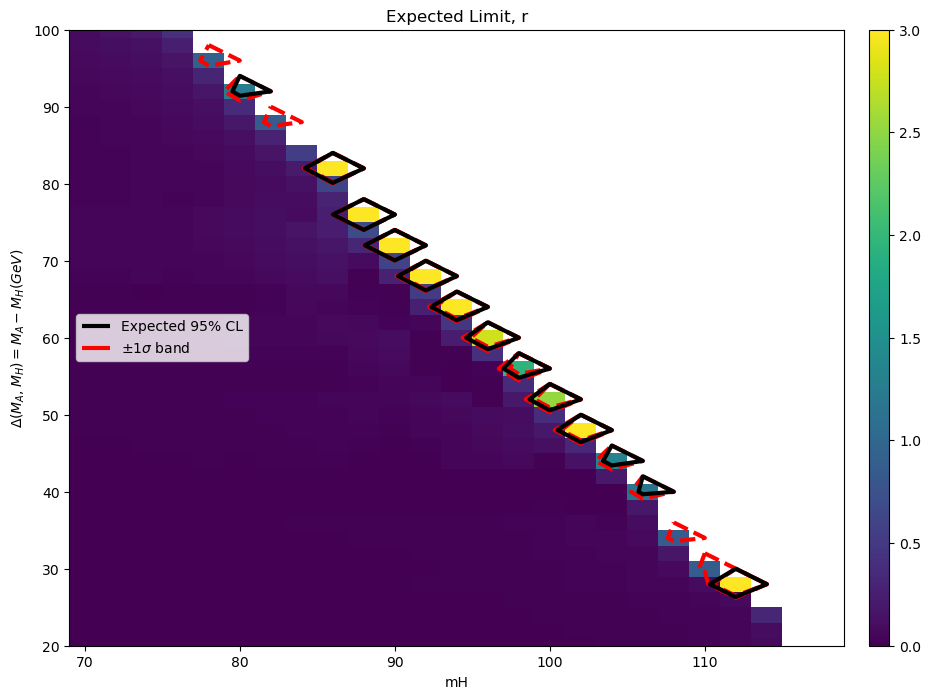

In [29]:
fig, ax = plt.subplots(figsize=(10,8))
cmap = plt.cm.viridis
cmap.set_bad(color='white')
masked_array = np.ma.masked_where(plot_grid == -1, plot_grid)
im = ax.imshow(masked_array, cmap = cmap, aspect='auto')


# Show all ticks and label them with the respective list entries
sep = 5
# Locations of the yticks
yticks_loc = np.arange(1, 45, 5)
yticks_names = np.arange(100, 10, -10) #np.arange(20, 102, 2)#diff_scan -1 #np.arange(20, 105, 5)
ax.set_yticks(yticks_loc, labels=yticks_names)
xticks_loc = np.arange(0, 31, 5)
xticks_names = np.arange(70, 140, 10)
ax.set_xticks(xticks_loc, labels=xticks_names)

plt.ylim(41, 1)


#plt.contour(plot_grid, np.array([1]) , colors=['yellow'], linewidths=[5])


con_up = plt.contour(plot_grid_for_up_contour, np.array([1]), colors=['red'], 
                     linewidths=[3], linestyles=['--'])
handles_unfilled_up, labels_up = con_up.legend_elements()

con_down = plt.contour(plot_grid_for_down_contour, np.array([1]), colors=['red'], 
                     linewidths=[3], linestyles=['--'])
handles_unfilled_down, labels_down = con_down.legend_elements()

con = plt.contour(plot_grid_for_contour, np.array([1]), colors=['black'], linewidths=[3])
handles_unfilled, labels = con.legend_elements()

ax.legend(handles_unfilled + handles_unfilled_up,
          ["Expected 95% CL", r"$\pm 1 \sigma$ band", r"Expected 95% CL - $\sigma$"], loc='center left')


im.set_clim(0, 3)

plt.xlabel("mH")
plt.ylabel(r"$\Delta(M_A,M_H) = M_A - M_H (GeV)$")   

plt.title("Expected Limit, r")
cax = fig.add_axes([ax.get_position().x1+0.025,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax)